# 2. Python

We will be using the following PyData Tools for the Exercises:

* Pandas: <http://pandas.pydata.org/>
* NumPy: <http://www.numpy.org/>
* Scikit-Learn: <http://scikit-learn.org/>

This tutorial is based on:


* Wes McKinnedy, Python for Data Analysis, 2nd Editions, <https://github.com/wesm/pydata-book>
* <https://github.com/jonathanrocher/pandas_tutorial/blob/master/analyzing_and_manipulating_data_with_pandas_manual.pdf>




# 2.1 Tutorial

Follow and execute the Examples Notebooks in the Folder:

* Python and iPython Introduction
* Python Data Structures
* Pandas Tour
* NumPy Tour

# 2.2 Practical Exercise

Use the Iris dataset from the scikit-learn Dataset API to solve the following tasks:
1. How many flowers of each kind are in the dataset!
2. What is the average and stdev of all four attributes for all flowers and per flower group?
3. Plot the result!

In [2]:
%matplotlib inline
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [5]:
# 1.
iris_df.groupby(['target_name']).size().reset_index(name='counts')

,target_name,counts
0,setosa,50
1,versicolor,50
2,virginica,50


In [6]:
# 2.
iris_df.agg(['mean', 'std'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232


In [27]:
iris_df.groupby(['target_name']).agg(['mean', 'std'])

sepal length (cm)           sepal width (cm)            \
                         mean       std             mean       std   
target_name                                                          
setosa                  5.006  0.352490            3.418  0.381024   
versicolor              5.936  0.516171            2.770  0.313798   
virginica               6.588  0.635880            2.974  0.322497   

            petal length (cm)           petal width (cm)           target       
                         mean       std             mean       std   mean  std  
target_name                                                                     
setosa                  1.464  0.173511            0.244  0.107210      0  0.0  
versicolor              4.260  0.469911            1.326  0.197753      1  0.0  
virginica               5.552  0.551895            2.026  0.274650      2  0.0

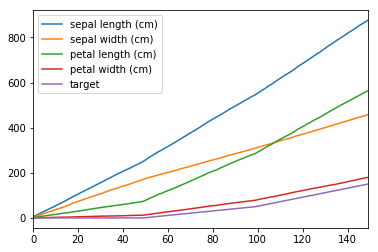

In [7]:
plot_df = iris_df.cumsum()
plt.figure(); plot_df.plot();

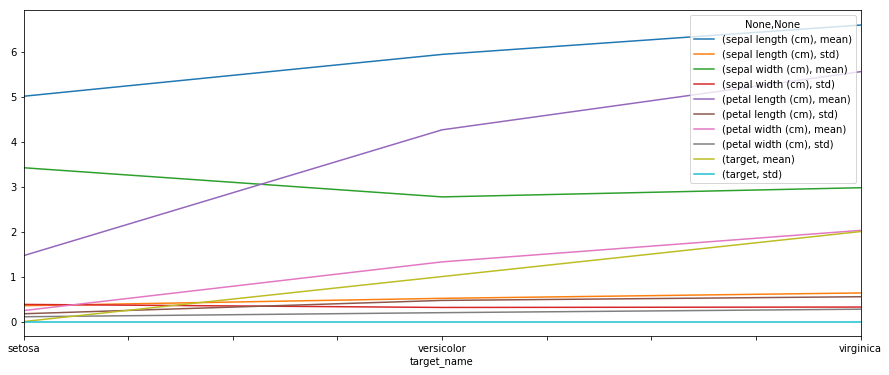

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
iris_df.groupby(['target_name']).agg(['mean', 'std']).plot(ax=ax)

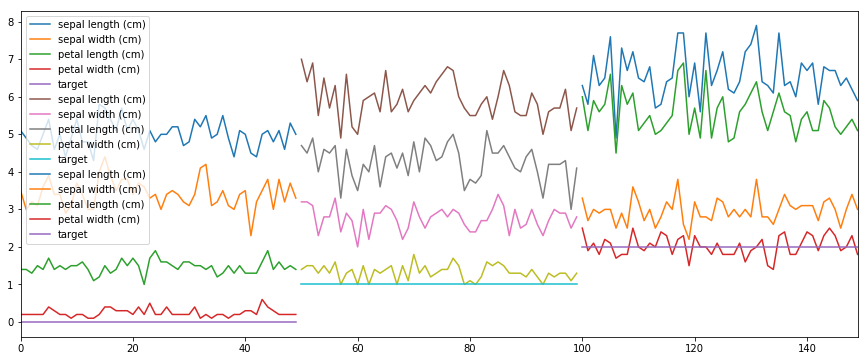

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
for name, group in iris_df.groupby('target_name'):
    group.plot(ax=ax, label=name)
plt.show()